## Generating maps and mosaic

In this chapter we will see how to generate vignetting corrected sky maps based on pre-generated count maps, background maps and exposure maps.<br/>

### Step 1)
To start try to produce a  vignetting corrected, background subtracted map for MOS1 and MOS2 independently.
In the data directory, three poitings of the large (1° diameter) SNR RX J1713 have been pre-processed in the 0.5-2 keV energy band.
For each observation and for each MOS1, MOS2 cameras, three images are availabe:<br/>

\*IMAGE\*FTZ:  count map   <br/>
\*BKGND\*FTZ:  background map from Blank Sky observations <br/>
\*EXPMAP\*FTZ:  exposure map  <br/>




In [1]:
#Let's get started by loading the usual modules
%matplotlib inline
from __future__ import  division, print_function
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, fixed
from astropy.io import fits
from astropy import table, wcs
from astropy.convolution import convolve,convolve_fft, Gaussian2DKernel
from matplotlib.colors import PowerNorm,LogNorm

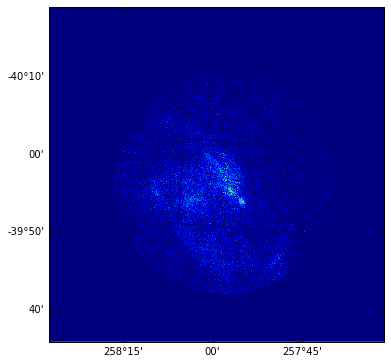

In [3]:
datadir='data/'
imagefile=datadir+'P0093670301M2S003IMAGE_2000.FTZ'
bkgfile=datadir+'P0093670301M2S003BKGND_2000.FTZ'
expfile=datadir+'P0093670301M2S003EXPMAP2000.FTZ'



image=fits.getdata(imagefile)
bkg=fits.getdata(bkgfile)
exp=fits.getdata(expfile)

hdr=fits.getheader(imagefile)
w = wcs.WCS(hdr)

# ... Fill in missing code here ...
# Your goal is to produce a vignetting corrected, bkg subtracted image
# Then smooth the image. Use the Gaussian2DKernel and convolve function from astropy


fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1, 1, 1, projection=w) # define a figure in WCS coordinate using header information
ax.imshow(image)
#To plot an image use the ax.imshow(toto) command


    


In [4]:
ls data/mosaic*

data/mosaic_bkgmap.fits  data/mosaic_cmap.fits    data/mosaic_expmap.fits


## Step 2)

Try to redo the same process but this time to create a small mosaic by mosaicing together MOS1+MOS2 cameras in all three observations.

To stitch images together you can use the SAS command emosaic. Example:<br/>
<pre> emosaic imagesets="image1.fits image2.fits" mosaicedset=mosaic.fits </pre>

To execute a shell command use within python:

<pre>subprocess.call('emosaic imagesets="image1.fits image2.fits" mosaicedset=mosaic.fits', shell=True) </pre>


Tips:<br/>
To select all files matching a regular expression use the glob module.<br/>
<pre>
import glob
for file in glob.glob('*IMAGE*FTZ'):
    print(file)</pre>
    


Create a command to mosaic the XMM count map, exposure map and bkg map of MOS1+MOS2 to create a mosaic of the several observations. <br/>
It's easier to create a full mosaic of cmap, exp map, bkg map for each instruments then sum it. 

In [9]:
ls data/

P0093670301M1S002BKGND_2000.FTZ* P0203470501M2S003BKGND_2000.FTZ*
P0093670301M1S002EXPMAP2000.FTZ* P0203470501M2S003EXPMAP2000.FTZ*
P0093670301M1S002IMAGE_2000.FTZ* P0203470501M2S003IMAGE_2000.FTZ*
P0093670301M2S003BKGND_2000.FTZ* P0207300201M1S001BKGND_2000.FTZ*
P0093670301M2S003EXPMAP2000.FTZ* P0207300201M1S001EXPMAP2000.FTZ*
P0093670301M2S003IMAGE_2000.FTZ* P0207300201M1S001IMAGE_2000.FTZ*
P0203470501M1S002BKGND_2000.FTZ* P0207300201M2S002BKGND_2000.FTZ*
P0203470501M1S002EXPMAP2000.FTZ* P0207300201M2S002EXPMAP2000.FTZ*
P0203470501M1S002IMAGE_2000.FTZ* P0207300201M2S002IMAGE_2000.FTZ*
